<a href="https://colab.research.google.com/github/jisoolee11/Deep-Learning/blob/main/DeepLearning%20for%20everyone/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MNIST 손글씨 인식하기(CNN)

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [ ]:
# seed값 걸정
seed = 0 
numpy.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05278, saving model to ./model/01-0.052782.hdf5

Epoch 00002: val_loss improved from 0.05278 to 0.03855, saving model to ./model/02-0.038551.hdf5

Epoch 00003: val_loss improved from 0.03855 to 0.03401, saving model to ./model/03-0.034014.hdf5

Epoch 00004: val_loss improved from 0.03401 to 0.03118, saving model to ./model/04-0.031176.hdf5

Epoch 00005: val_loss improved from 0.03118 to 0.02945, saving model to ./model/05-0.029451.hdf5

Epoch 00006: val_loss improved from 0.02945 to 0.02943, saving model to ./model/06-0.029432.hdf5

Epoch 00007: val_loss improved from 0.02943 to 0.02908, saving model to ./model/07-0.029082.hdf5

Epoch 00008: val_loss did not improve from 0.02908

Epoch 00009: val_loss did not improve from 0.02908

Epoch 00010: val_loss did not improve from 0.02908

Epoch 00011: val_loss did not improve from 0.02908

Epoch 00012: val_loss improved from 0.02908 to 0.02698, saving model to ./model/12-0.026983.hdf5

Epoch 00013

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 6s 20ms/step - loss: 0.0275 - accuracy: 0.9936

 Test Accuracy: 0.9936


In [ ]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

In [ ]:
# 학습셋의 오차
y_loss = history.history['loss']

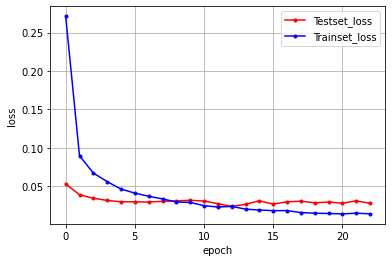

In [ ]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()